In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pylab as pl
from data import load_test_data, image_cols, image_rows
from skimage.transform import resize

% matplotlib inline

In [48]:
orig_test, imgs_id_test = load_test_data()
imgs_test = np.load('imgs_mask_test.npy')

argsort = np.argsort(imgs_id_test)
imgs_id_test = imgs_id_test[argsort]
imgs_test = imgs_test[argsort]

In [86]:
orig_test.shape

(5508, 420, 580)

In [85]:
imgs_test.shape

(5508, 96, 96, 1)

In [87]:
total = imgs_test.shape[0]

means = []
maxs = []
sums = []
pred = np.ndarray(shape=(total, image_rows, image_cols, 1))

for i in range(total):
    img = imgs_test[i]
    pred[i] = resize(img, (image_rows, image_cols), preserve_range=True, mode='constant')
    means.append(img.mean())
    maxs.append(img.max())
    sums.append(img.sum())
    if i % 1000 == 0:
        print('{}/{}'.format(i, total))

0/5508
1000/5508
2000/5508
3000/5508
4000/5508
5000/5508


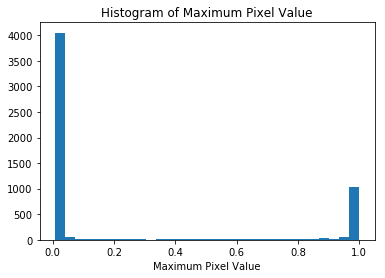

In [82]:
plt.hist(maxs, bins=30)
plt.xlabel('Maximum Pixel Value')
plt.title('Histogram of Maximum Pixel Value')
plt.show()

In [118]:
print("Median of the maximum pixel prediction is ", np.median(maxs))
print("60 percentile of the maximum pixel prediction is ", np.percentile(maxs, 60))
print("70 percentile of the maximum pixel prediction is ",  np.percentile(maxs, 70))
print("75 percentile of the maximum pixel prediction is ",  np.percentile(maxs, 75))

Median of the maximum pixel prediction is  0.0103315
60 percentile of the maximum pixel prediction is  0.0110401218757
70 percentile of the maximum pixel prediction is  0.0138163803145
75 percentile of the maximum pixel prediction is  0.126398392022


In [126]:
import pandas as pd
pd_max = pd.Series(maxs)
positive = (pd_max>0.5).sum()/len(maxs)
print("Model predicts that {:.0f}% of images have BP nerves.".format(positive*100))

Model predicts that 23% of images have BP nerves.


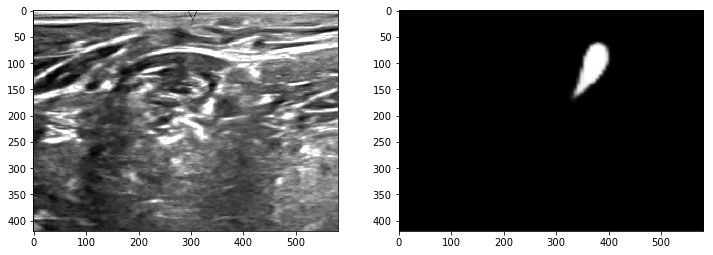

maximum pixel value: 0.9998337030410767


In [132]:
img_id = 12

plt.figure(figsize=(12,6))
pl.subplot(121)
pl.imshow(orig_test[img_id], cmap=cm.gray)
pl.subplot(122)
pl.imshow(np.squeeze(pred[img_id]), cmap=cm.gray)
plt.show()

print("maximum pixel value: {}".format(maxs[img_id]))

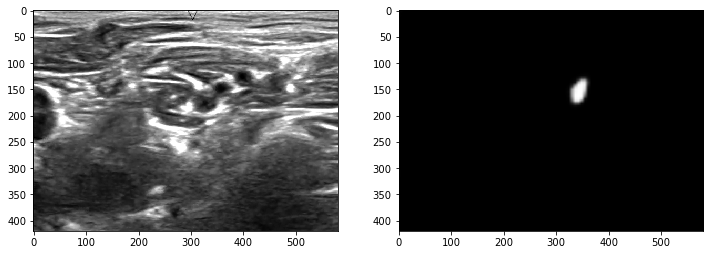

maximum pixel value: 0.9897825717926025


In [136]:
img_id = 19

plt.figure(figsize=(12,6))
pl.subplot(121)
pl.imshow(orig_test[img_id], cmap=cm.gray)
pl.subplot(122)
pl.imshow(np.squeeze(pred[img_id]), cmap=cm.gray)
plt.show()

print("maximum pixel value: {}".format(maxs[img_id]))

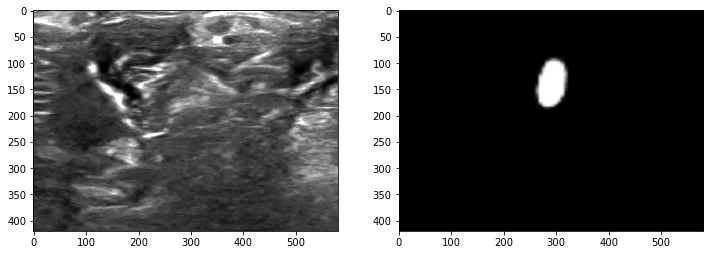

maximum pixel value: 0.9999933242797852


In [137]:
img_id = 23

plt.figure(figsize=(12,6))
pl.subplot(121)
pl.imshow(orig_test[img_id], cmap=cm.gray)
pl.subplot(122)
pl.imshow(np.squeeze(pred[img_id]), cmap=cm.gray)
plt.show()

print("maximum pixel value: {}".format(maxs[img_id]))

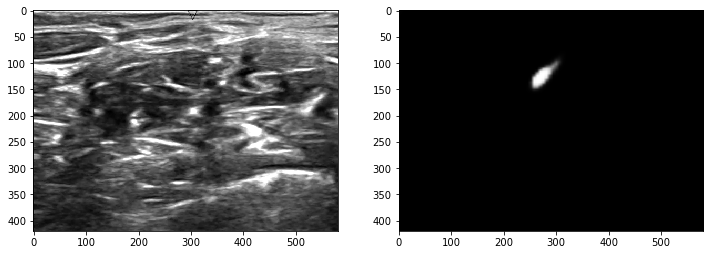

maximum pixel value: 0.9942183494567871


In [138]:
img_id = 34

plt.figure(figsize=(12,6))
pl.subplot(121)
pl.imshow(orig_test[img_id], cmap=cm.gray)
pl.subplot(122)
pl.imshow(np.squeeze(pred[img_id]), cmap=cm.gray)
plt.show()

print("maximum pixel value: {}".format(maxs[img_id]))